In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [256]:
test=pd.read_csv('Boston_Test.csv.csv')

In [257]:
train=pd.read_csv('Boston_Train.csv.csv')

In [258]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  155 non-null    int64  
 1   crim        155 non-null    float64
 2   zn          155 non-null    int64  
 3   indus       155 non-null    float64
 4   chas        155 non-null    int64  
 5   nox         155 non-null    float64
 6   rm          155 non-null    float64
 7   age         155 non-null    float64
 8   dis         155 non-null    float64
 9   rad         155 non-null    int64  
 10  tax         155 non-null    int64  
 11  ptratio     155 non-null    float64
 12  black       155 non-null    float64
 13  lstat       155 non-null    float64
 14  medv        155 non-null    float64
dtypes: float64(10), int64(5)
memory usage: 18.3 KB


In [259]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  351 non-null    int64  
 1   crim        351 non-null    float64
 2   zn          351 non-null    float64
 3   indus       351 non-null    float64
 4   chas        351 non-null    int64  
 5   nox         351 non-null    float64
 6   rm          351 non-null    float64
 7   age         351 non-null    float64
 8   dis         351 non-null    float64
 9   rad         351 non-null    int64  
 10  tax         351 non-null    int64  
 11  ptratio     351 non-null    float64
 12  black       351 non-null    float64
 13  lstat       351 non-null    float64
 14  medv        351 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.3 KB


In [260]:
train.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,175.000000,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,101.469207,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,87.500000,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,175.000000,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,262.500000,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,350.000000,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [261]:
train.shape

(351, 15)

In [262]:
test.shape

(155, 15)

In [263]:
test.head(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1


In [264]:
train.tail(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
350,350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9


# Exploratory Data Analysis

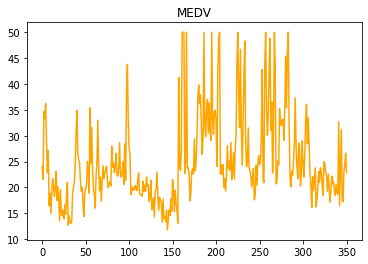

In [314]:
train['medv'].plot(color='orange')
plt.title('MEDV')
plt.show()

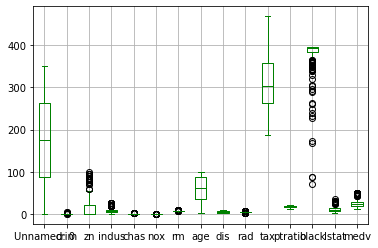

In [266]:
train.boxplot(color='green')
plt.show()

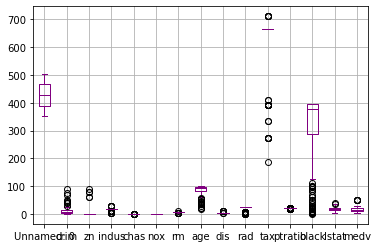

In [267]:
test.boxplot(color='purple')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


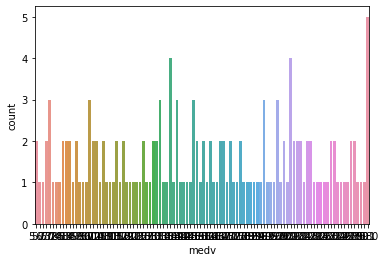

In [268]:
sns.countplot(test['medv'])
plt.show()


In [269]:
corr=test.corr()
corr.shape

(15, 15)

<function matplotlib.pyplot.show(close=None, block=None)>

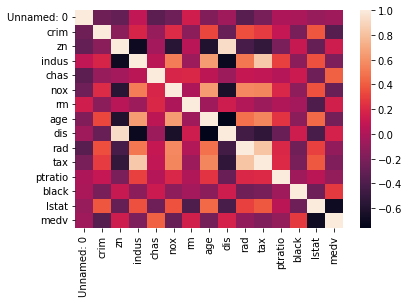

In [270]:
sns.heatmap(corr)
plt.show

In [271]:
corr1=train.corr()
corr1.shape

(15, 15)

<function matplotlib.pyplot.show(close=None, block=None)>

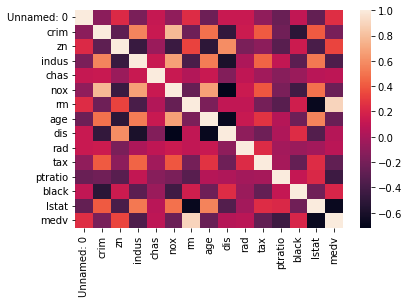

In [272]:
sns.heatmap(corr1)
plt.show

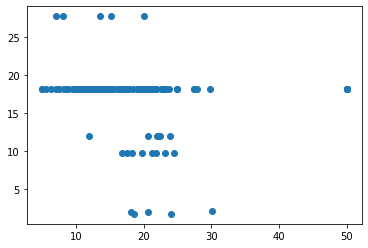

In [273]:
plt.scatter(test['medv'],test['indus'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


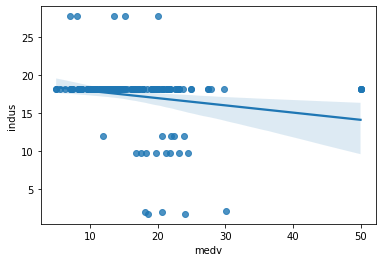

In [274]:
sns.regplot(test['medv'],test['indus'])
plt.show()

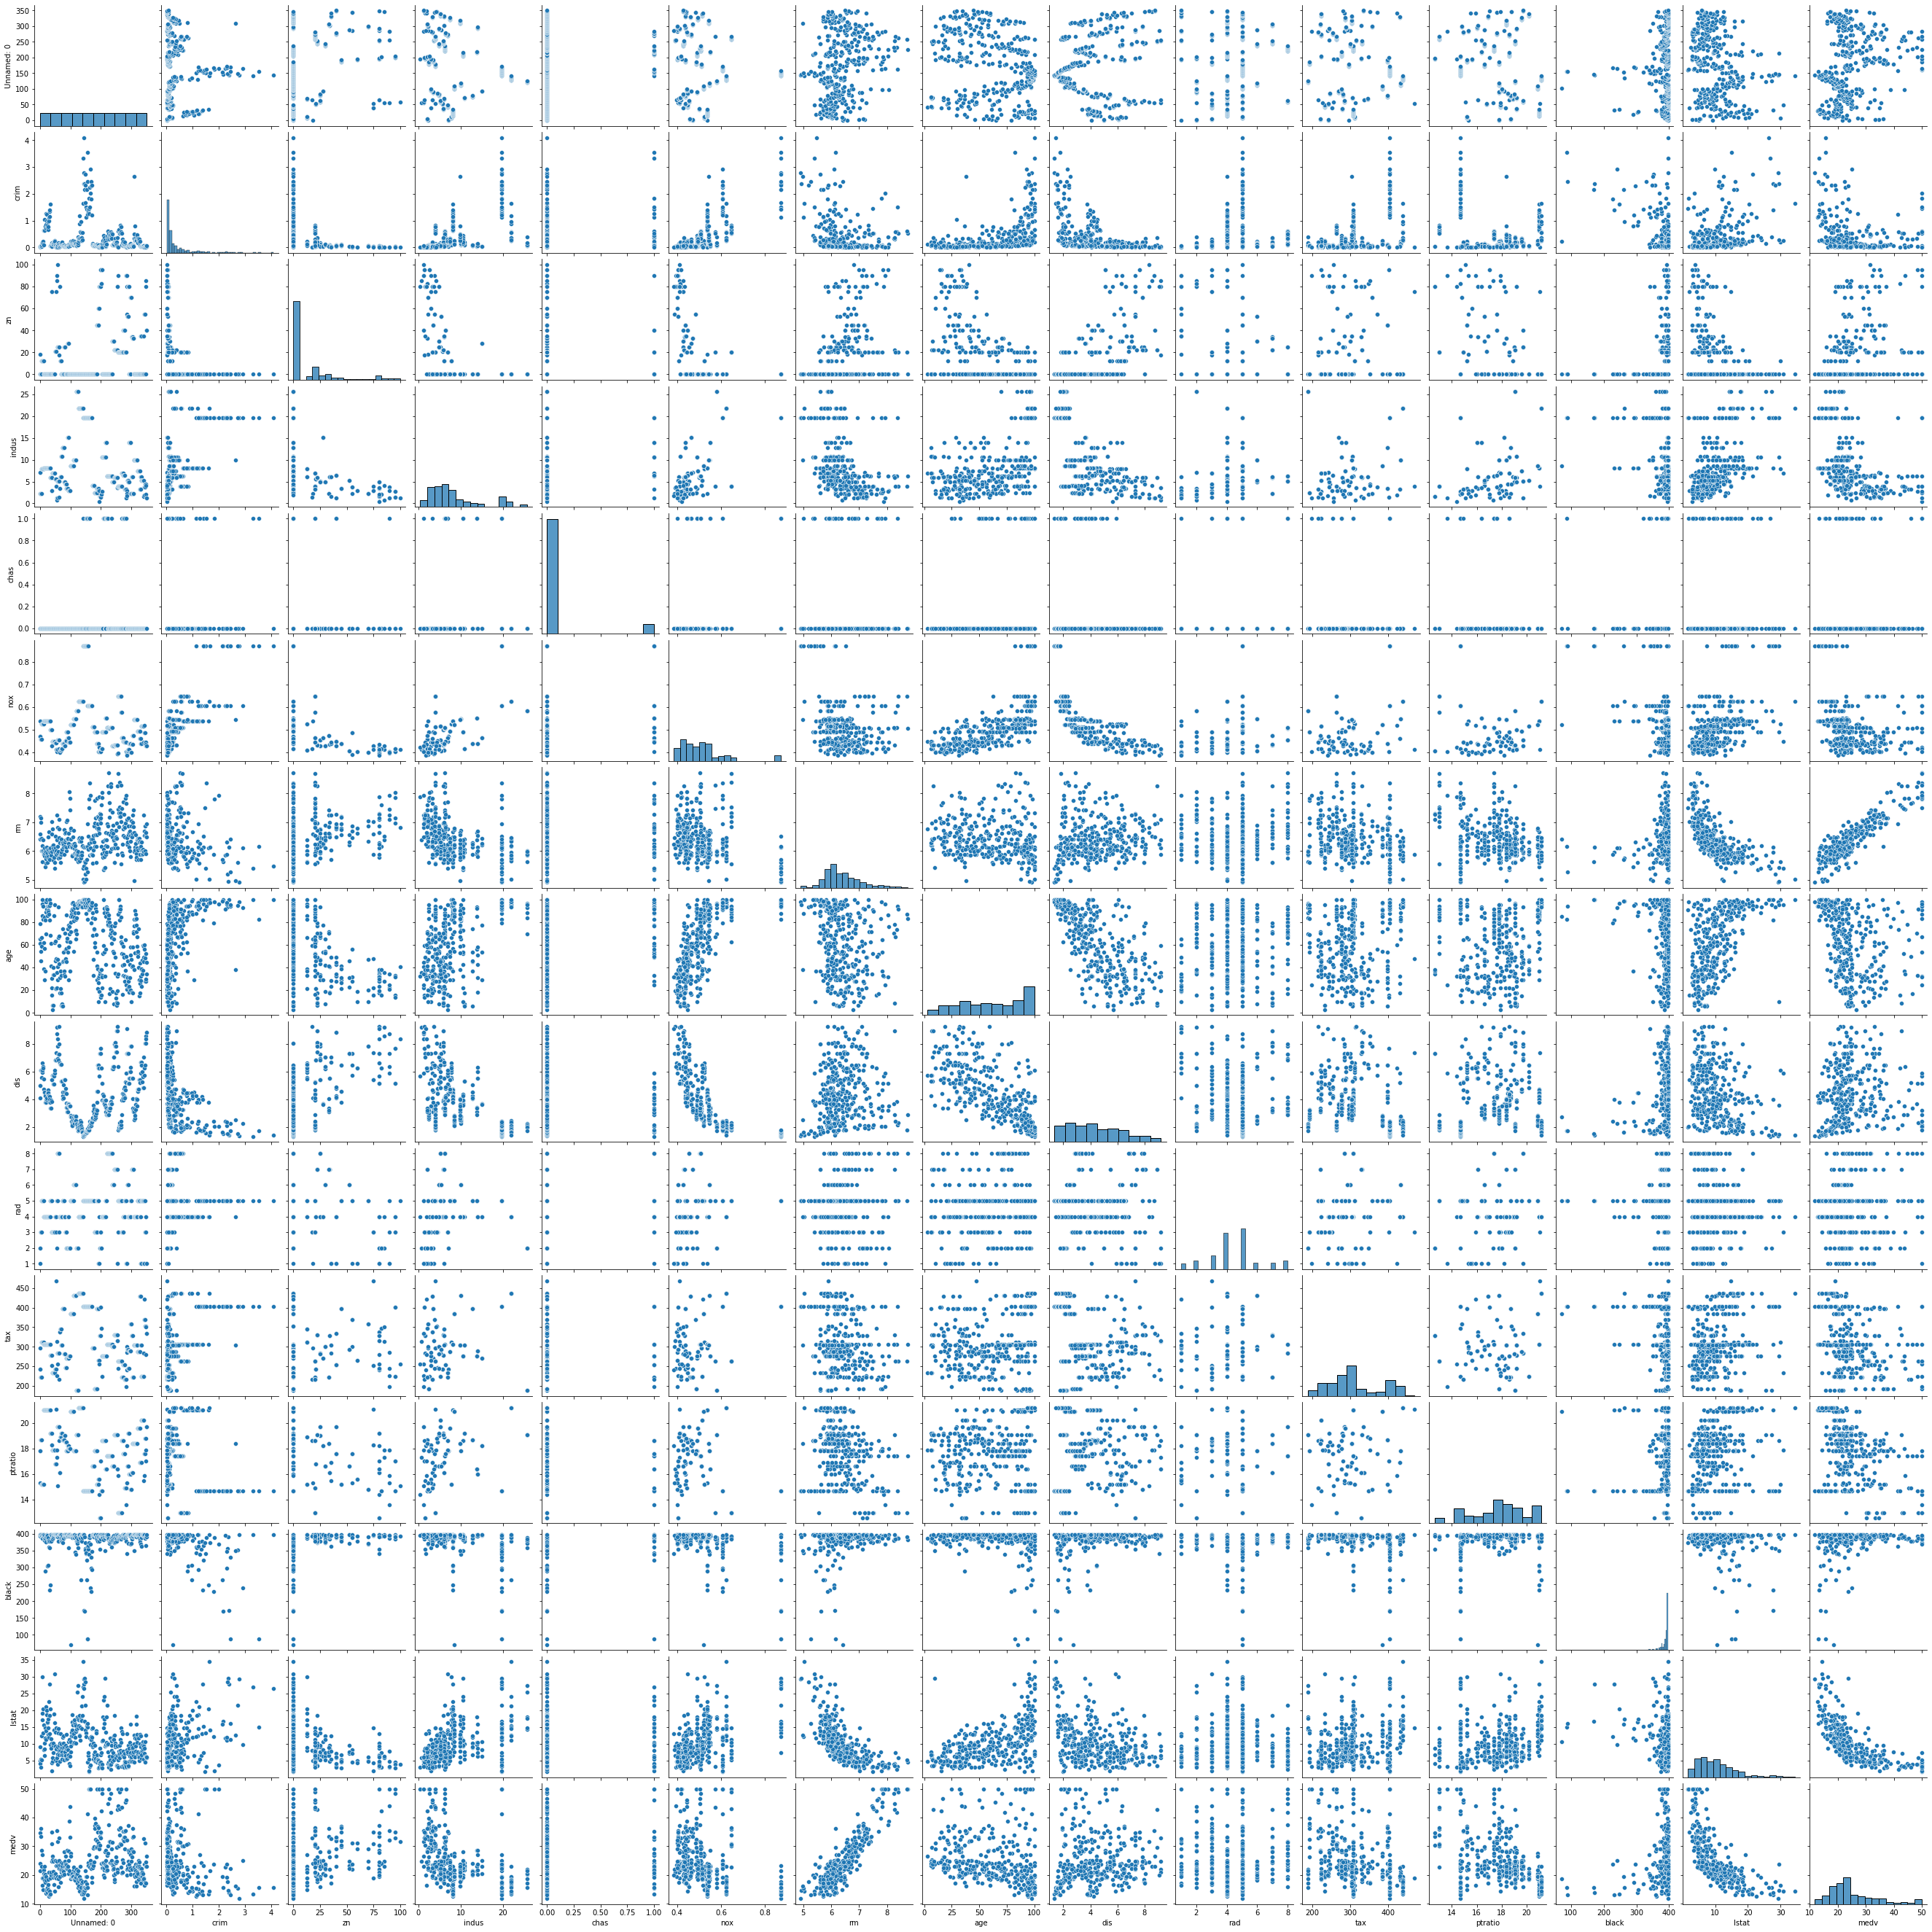

In [275]:
sns.pairplot(train)

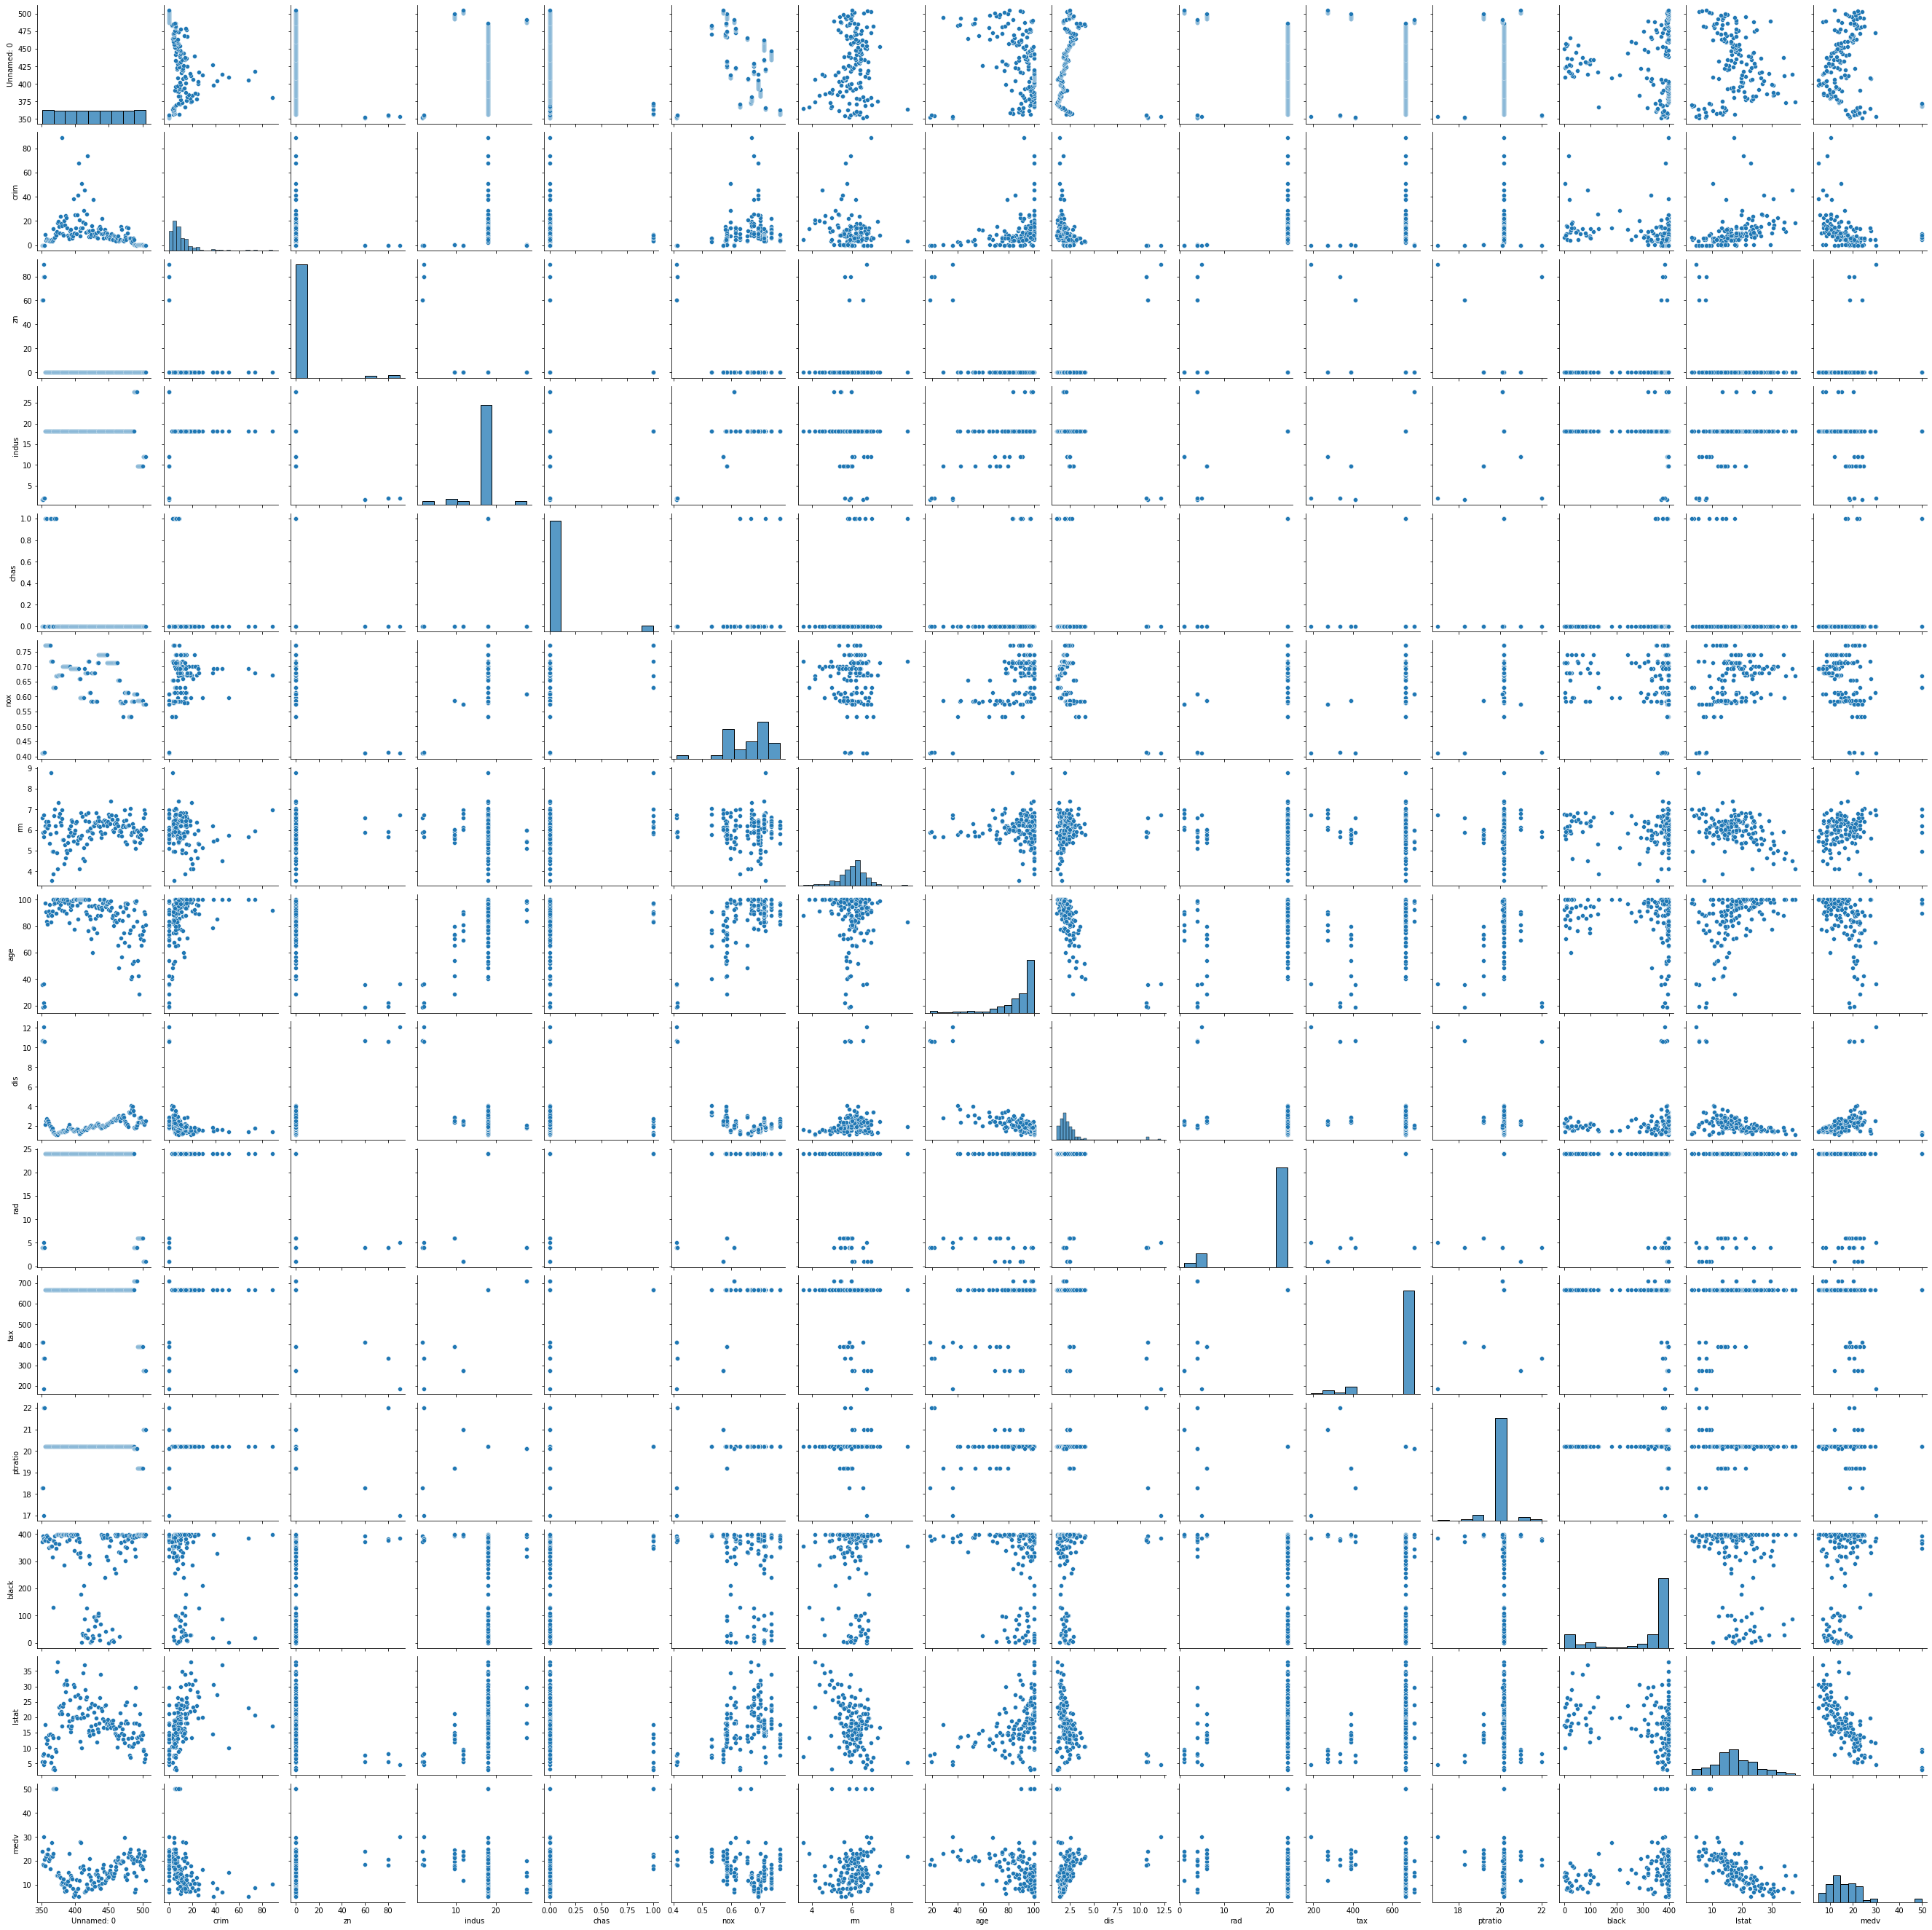

In [276]:
sns.pairplot(test)

In [277]:
train['medv'].var()

71.60406023606019

In [278]:
test['medv'].var()

67.02063426895687

In [279]:
model=LinearRegression()

In [280]:
X_train,X_test = train,test

In [281]:
y_train,y_test=train['medv'],test['medv']

In [282]:
model.fit(X_train,y_train)

LinearRegression()

In [283]:
y_pred = model.predict(X_train)

In [284]:
print("Training Accuracy:",model.score(X_train,y_train)*100)

Training Accuracy: 100.0


In [285]:
print("Testing Accuracy:",model.score(X_test,y_test)*100)

Testing Accuracy: 100.0


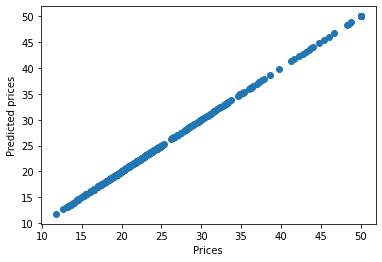

In [286]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

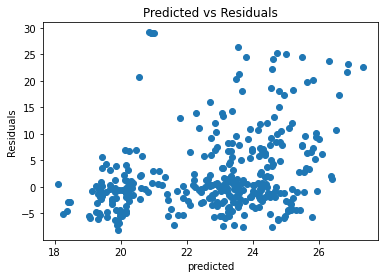

In [315]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("predicted")
plt.ylabel("Residuals")
plt.show()

In [288]:
print('R^2:',r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 7.677302921282565e-15
MSE: 9.102241214088598e-29
RMSE: 9.540566657221466e-15


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


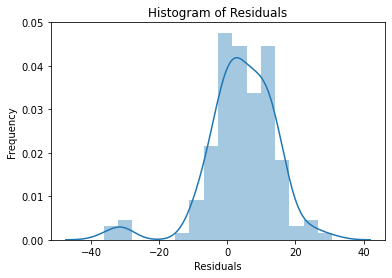

In [289]:
sns.distplot(y_train-y_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [290]:
y_test_pred=model.predict(X_test)

In [291]:
acc_linreg=r2_score(y_test,y_test_pred)
print('R^2:',r2_score(y_test,y_test_pred))
print('Adjusted R^2:',1-(1-r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test,y_test_pred))
mae_linreg=mean_absolute_error(y_test,y_test_pred)
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 3.1235229456679885e-14
MSE: 1.4633471580353668e-27
RMSE: 3.825372083909442e-14


In [292]:
reg=RandomForestRegressor()

In [293]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [294]:
y_pred=reg.predict(X_train)

In [313]:
print('R^2:',r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

R^2: 0.1288973848451601
Adjusted R^2: 0.08989279013673435
MAE: 5.150680446345195
MSE: 62.19677904435289
RMSE: 7.886493456812913


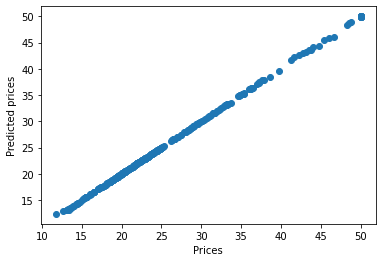

In [296]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

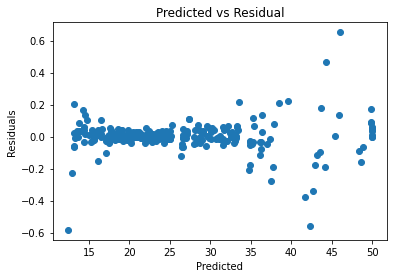

In [297]:
plt.scatter(y_pred,y_train-y_pred)
plt.title('Predicted vs Residual')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

In [298]:
y_test_pred=reg.predict(X_test)

In [299]:
acc_rf=r2_score(y_test,y_test_pred)
print('R^2:',r2_score(y_test,y_test_pred))
print('Adjusted R^2:',1-(1-r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test,y_test_pred))
mae_rf=mean_absolute_error(y_test,y_test_pred)
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.9315825285572878
Adjusted R^2: 0.9241993481857721
MAE: 1.0549999999999984
MSE: 4.55579921935482
RMSE: 2.1344318258859474


In [300]:
reg=svm.SVR()

In [301]:
reg.fit(X_train,y_train)

SVR()

In [302]:
y_pred=reg.predict(X_train)

In [303]:
print('R^2:',r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

R^2: 0.1288973848451601
Adjusted R^2: 0.08989279013673435
MAE: 5.150680446345195
MSE: 62.19677904435289
RMSE: 7.886493456812913


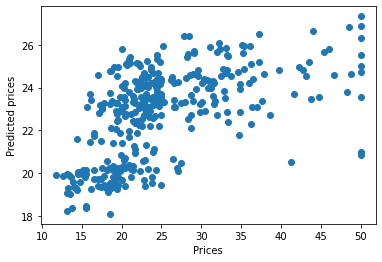

In [304]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

Text(0, 0.5, 'Residuals')

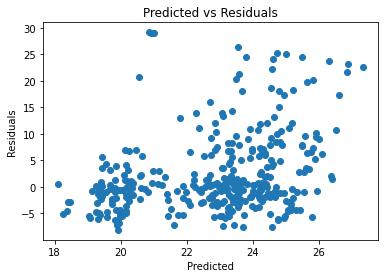

In [316]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel('Predicted')
plt.ylabel('Residuals')

In [306]:
acc_svm=r2_score(y_test,y_test_pred)
print('R^2:',r2_score(y_test,y_test_pred))
print('Adjusted R^2:',1-(1-r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test,y_test_pred))
mae_svm=mean_absolute_error(y_test,y_test_pred)
print('MSE:',mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

R^2: 0.9315825285572878
Adjusted R^2: 0.9241993481857721
MAE: 1.0549999999999984
MSE: 4.55579921935482
RMSE: 2.1344318258859474


In [307]:
model=pd.DataFrame({'Models':['Linear Regresion','Random Forest','Support Vector Machines'],'R Squared values':[acc_linreg*100,acc_rf*100,acc_svm*100],'Mean Absolute Error':[mae_linreg*100,mae_rf*100,mae_svm*100]})


In [308]:
model

,Models,R Squared values,Mean Absolute Error
0,Linear Regresion,100.000000,3.123523e-12
1,Random Forest,93.158253,1.055000e+02
2,Support Vector Machines,93.158253,1.055000e+02
